In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data
data = pd.read_csv('Mall_customers.csv')

In [3]:
# Select relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Initialize the K-means clustering algorithm
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)


In [6]:
# Fit the model to the scaled data
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [7]:
# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


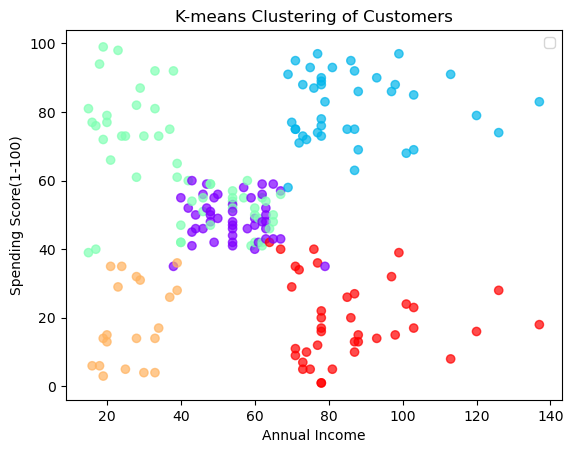

In [12]:
# Visualize the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow', marker='o', alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.title('K-means Clustering of Customers')
plt.legend()
plt.show()

In [13]:
# Print the cluster centers (in scaled space)
cluster_centers_scaled = kmeans.cluster_centers_
print("Cluster Centers (Scaled):")
print(cluster_centers_scaled)

Cluster Centers (Scaled):
[[ 1.20484056 -0.23577338 -0.05236781]
 [-0.42880597  0.97484722  1.21608539]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.5310735  -1.2905084  -1.23646671]
 [ 0.07333084  0.97494509 -1.19729675]]


In [14]:
# Print the cluster centers (in original space)
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
print("Cluster Centers (Original):")
print(cluster_centers_original)

Cluster Centers (Original):
[[55.63829787 54.38297872 48.85106383]
 [32.875      86.1        81.525     ]
 [25.18518519 41.09259259 62.24074074]
 [46.25       26.75       18.35      ]
 [39.87179487 86.1025641  19.35897436]]


In [15]:
# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_


In [16]:
# Perform cluster analysis
cluster_analysis = data.groupby('Cluster').mean()

In [17]:
# Print cluster analysis
print("Cluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        161.025000  32.875000           86.100000               81.525000
2         55.648148  25.185185           41.092593               62.240741
3         24.100000  46.250000           26.750000               18.350000
4        159.743590  39.871795           86.102564               19.358974


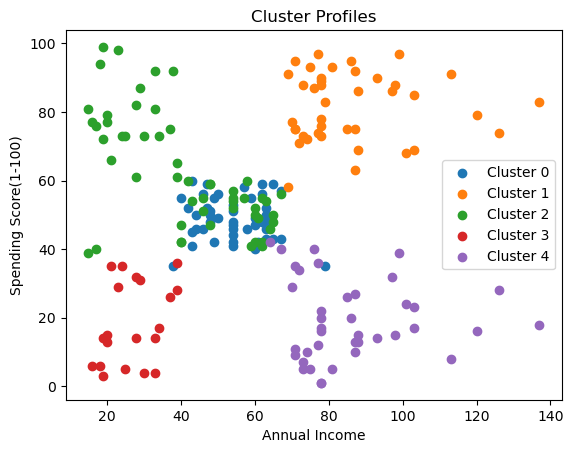

In [18]:
# Visualize cluster profiles
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_id}')
    
plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')
plt.title('Cluster Profiles')
plt.legend()
plt.show()

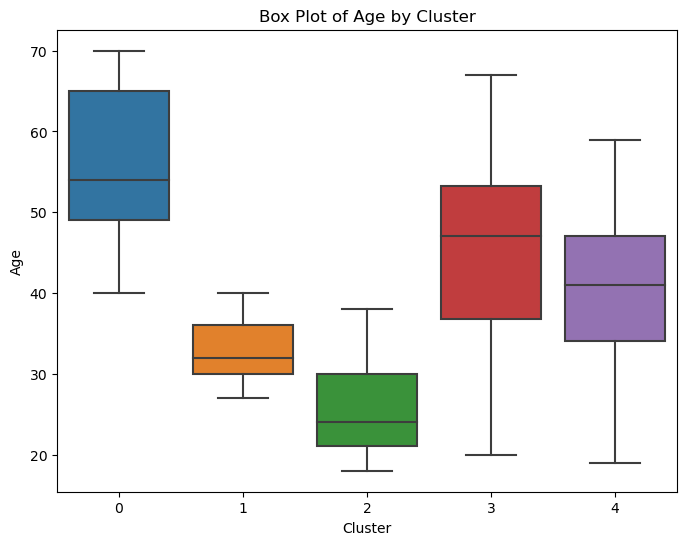

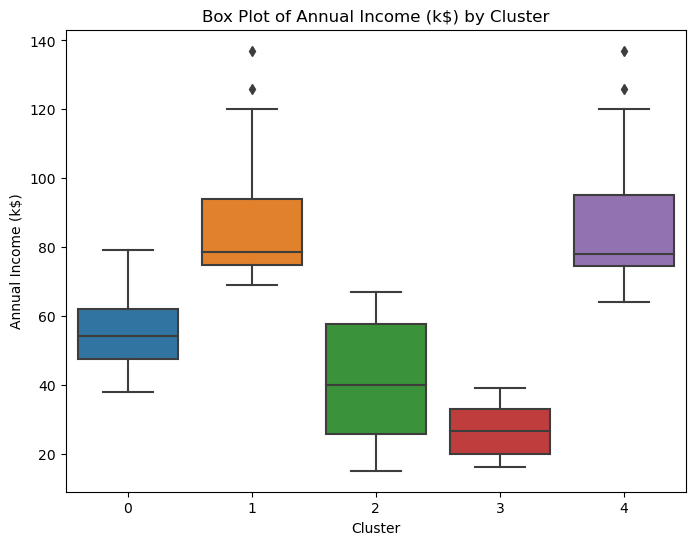

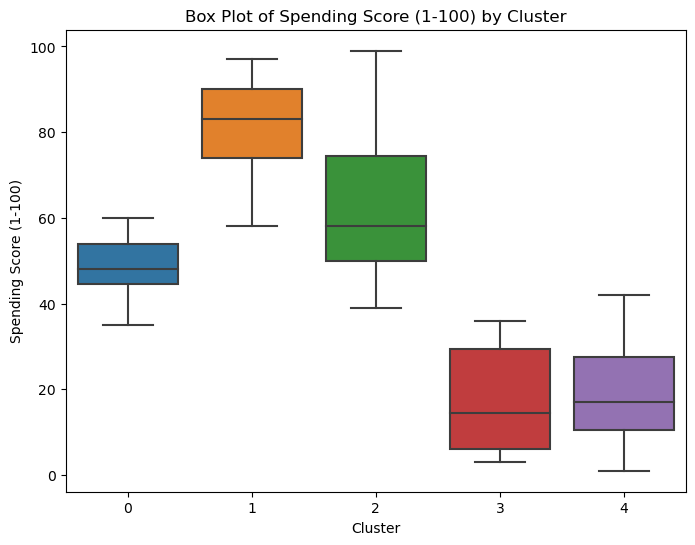

In [19]:
# Box plots for each feature within each cluster
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()

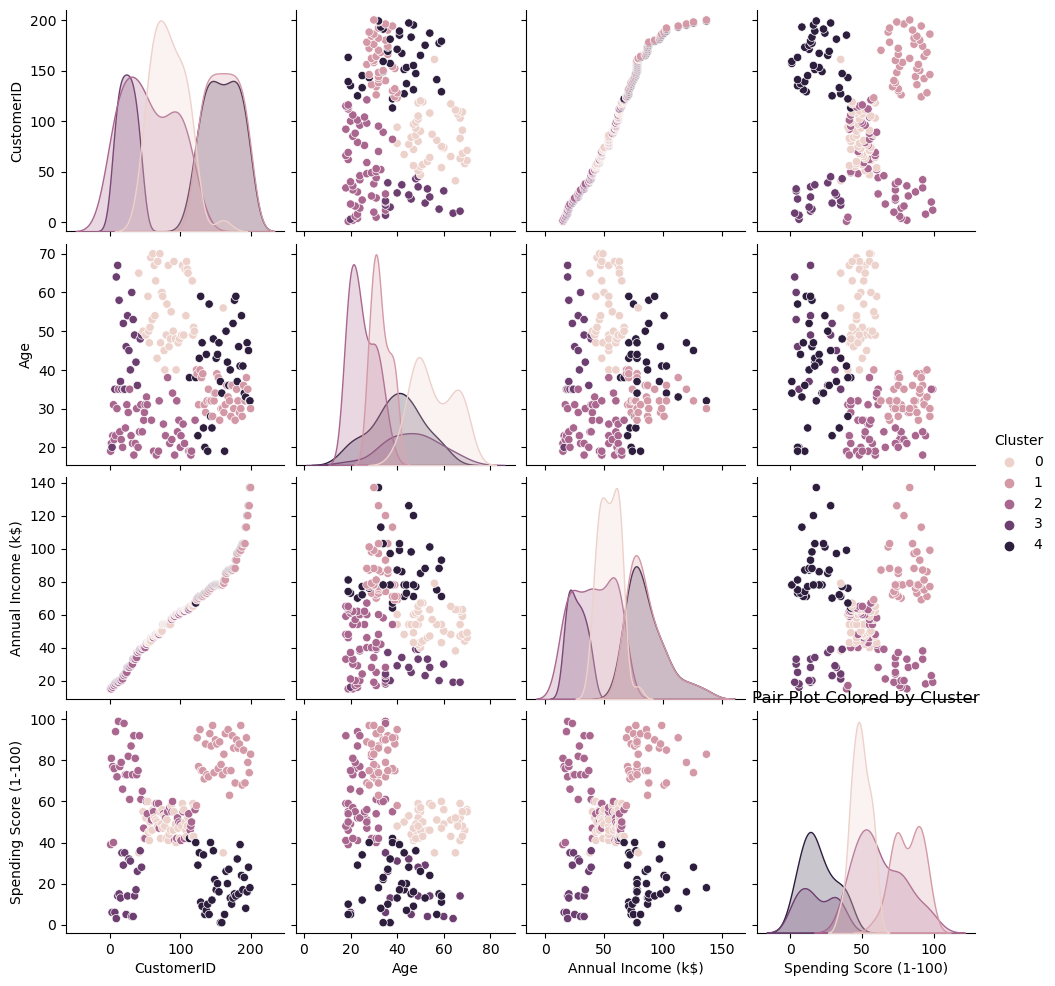

In [20]:
# Pair plot colored by cluster
sns.pairplot(data=data, hue='Cluster', diag_kind='kde')
plt.title('Pair Plot Colored by Cluster')
plt.show()

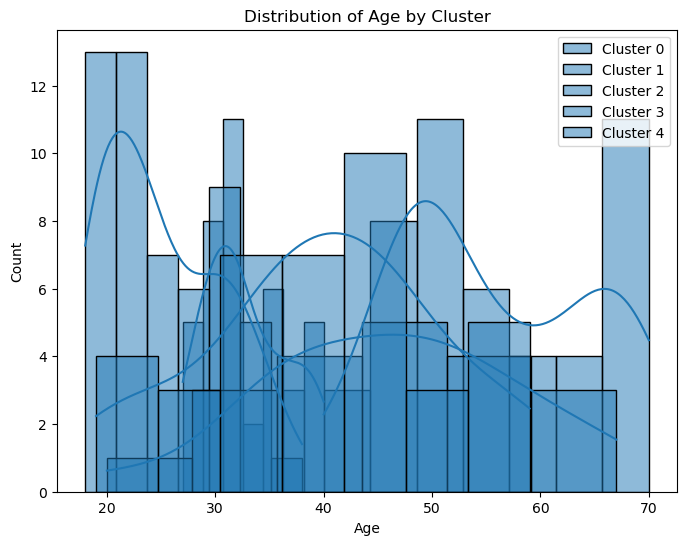

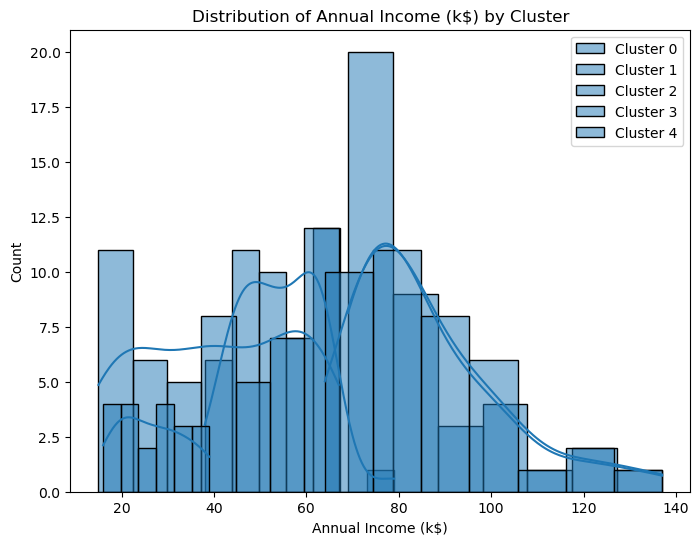

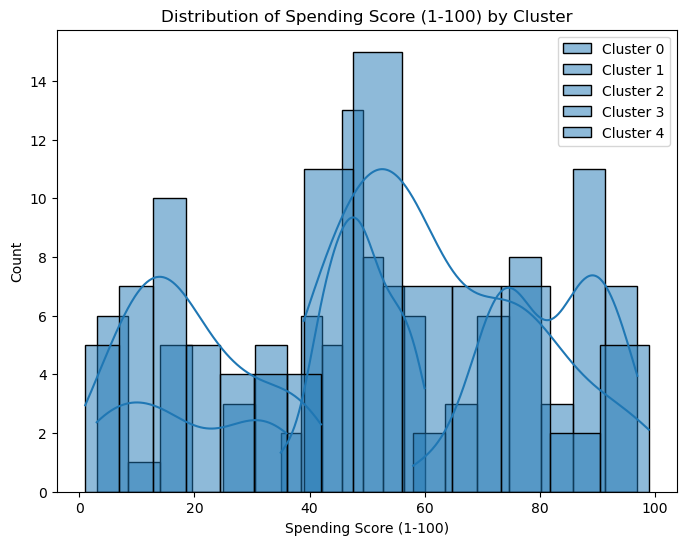

In [21]:
# Distribution plots for each feature within each cluster
for feature in features:
    plt.figure(figsize=(8, 6))
    for cluster_id in range(num_clusters):
        cluster_data = data[data['Cluster'] == cluster_id]
        sns.histplot(cluster_data[feature], label=f'Cluster {cluster_id}', kde=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
    plt.show()